## SCRIPT TO MAKE A NICE TABLE OUT OF RESULTS

In [1]:
import json 
import os
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#!cd webnlgResults/webnlg_semantic_results && ls
!cd WEBNLG/webnlg_gridsearch && ls

Instances_list Subclasses_KG  entities_list  reification


In [9]:
cd /home/gabhoo/research/kg2Narrative/KGNarrative2

/home/gabhoo/research/kg2Narrative/KGNarrative2


In [3]:
# print(os.getcwd())

# # change working directory to 'path/to/directory'
# os.chdir('WEBNLG/webnlg_gridsearch')

# # print new current working directory
# print(os.getcwd())
# !pwd

In [36]:
exp='FINAL_RESULTS/DWIE'
#exp='webnlg_semantic_results'
exp_columns=['Instances_list', 'Instances_KG' , 'Types_KG', 'Subclasses_KG' , 'multi_Subclasses_KG' ]

#exp='webnlg_reification_results'
exp_columns=['entities_list','semantic_of_news']


results=[]
for i in exp_columns:
    path=f'./{exp}/{i}/output_metrics.json'

    with open(path) as f:
        data = json.load(f)

   
    planner=i
    bleu=data[3]['bleu']
    google_bleu=data[4]['google_bleu']
    meteor=data[5]['meteor']
    bertscore=data[6]['Bert_Score']['f1']
    bleurt=data[7]['bleurt_score']
    #parent_score=data[8]['PARENT']['f_score']
    training_duration=data[9]['time(s)']
    gpuUSED=data[10]['gpu']
    
    #scores=[bleu,google_bleu,meteor,bertscore,bleurt,parent_score]
    scores=[bleu,google_bleu,meteor,bertscore,bleurt]
    

    scores=[i.replace('_'," ")]+[round(x,3) for x in scores]

    results.append(scores)

#columns=['planner','BLEU','GBLEU','Meteor','BERTscore(f1)','BLEURT','PARENT(f)']
columns=['planner','BLEU','GBLEU','Meteor','BERTscore(f1)','BLEURT']

d1 = pd.DataFrame(results, columns=columns)


print(d1.to_latex(index=False))





KeyError: 'PARENT'

\begin{tabular}{lrrrrrr}
\toprule
         planner &  BLEU &  GBLEU &  Meteor &  BERTscore(f1) &  BLEURT &  PARENT(f) \\
\midrule
   entities\_list & 0.296 &  0.312 &   0.482 &          0.865 &   0.608 &      0.365 \\
semantic\_of\_news & 0.263 &  0.283 &   0.452 &          0.848 &   0.574 &      0.317 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_23771/1281361987.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(d1.to_latex(index=False))


## GRAPHS

In [14]:
names=os.listdir('./webnlg_gridsearch/Types/')
names

['0.0001_3_2_output_metrics.json',
 '0.0001_3_3_output_metrics.json',
 '0.0001_1_4_output_metrics.json',
 '0.0001_1_3_output_metrics.json',
 '0.0001_1_2_output_metrics.json',
 '0.0001_3_4_output_metrics.json',
 '0.0001_4_4_output_metrics.json',
 '0.0001_4_3_output_metrics.json',
 '0.0001_4_2_output_metrics.json',
 '0.0001_2_2_output_metrics.json',
 '0.0001_2_3_output_metrics.json',
 '0.0001_2_4_output_metrics.json']

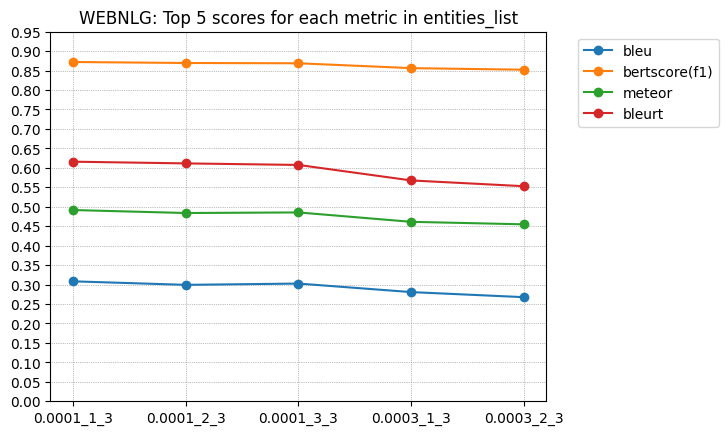

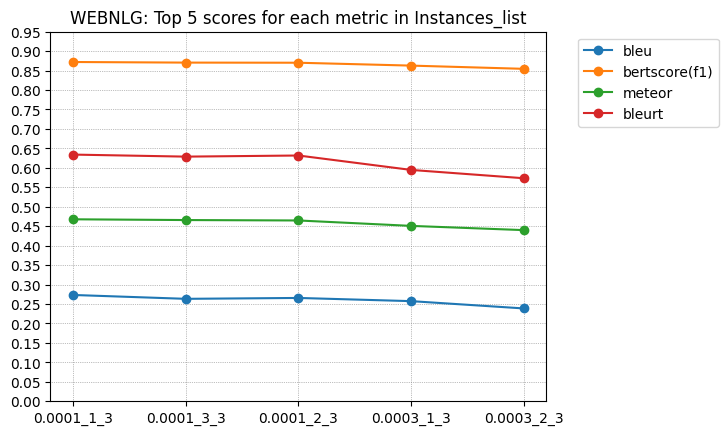

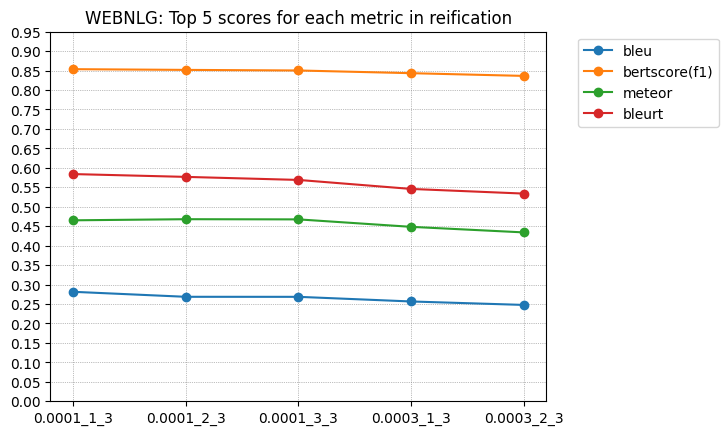

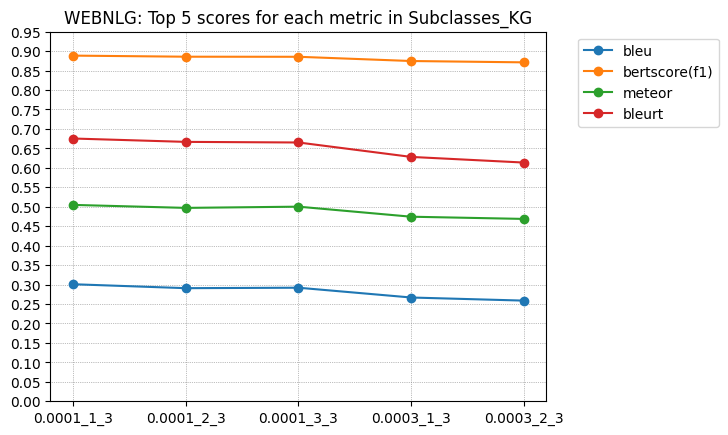

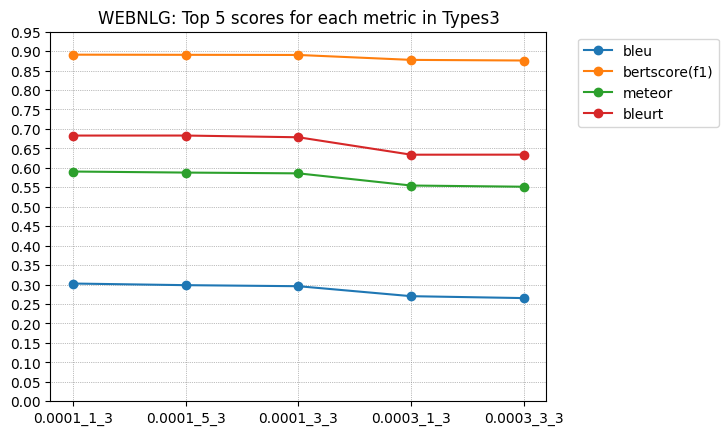

In [70]:
#With new format +2 to get right index

def get_df_scores(filename):
    names=os.listdir(filename)
    names.remove('stories_withInput.json')
    names.remove('runs')
    blues={}
    bertscores={}
    meteors={}
    bleurts={}
    df_list=[]
    for n in names:
        #print(n)
        with open(filename+n,'r') as f:
            scores = json.load(f)
            vals=n.split('_output_')[0]
            #print(vals)        #print(scores[1])
            blues[vals]=scores[1+2]['bleu']
            bertscores[vals]=scores[4+2]['Bert_Score']['f1']
            meteors[vals]=scores[3+2]['meteor']
            bleurts[vals]=scores[5+2]['bleurt_score']
            
            df_list.append((vals,scores[1+2]['bleu'],scores[4+2]['Bert_Score']['f1'],scores[3+2]['meteor'],scores[5+2]['bleurt_score']))
        

    df = pd.DataFrame(df_list, columns=['vals', 'bleu', 'bertscore(f1)','meteor','bleurt'])
    df = df.sort_values(by='bertscore(f1)', ascending=False).head(5)
    plt.plot(df['vals'], df['bleu'],label='bleu',marker='o')
    plt.plot(df['vals'], df['bertscore(f1)'],label='bertscore(f1)',marker='o')
    plt.plot(df['vals'], df['meteor'],label='meteor',marker='o')
    plt.plot(df['vals'], df['bleurt'],label='bleurt',marker='o')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(color='grey', linestyle=':', linewidth=0.5)
    yticks = np.arange(0, 1, 0.05)
    plt.yticks(yticks)
    plt.title(f'WEBNLG: Top 5 scores for each metric in {filename.split("/")[-2]}')
    plt.show()

#With new format +2 to get right index

def get_df_scores_OLD(filename):
    names=os.listdir(filename)
    blues={}
    bertscores={}
    meteors={}
    bleurts={}
    df_list=[]
    for n in names:
        #print(n)
        with open(filename+n,'r') as f:
            scores = json.load(f)
            vals=n.split('_output_')[0]
            #print(vals)        #print(scores[1])
            blues[vals]=scores[1]['bleu']
            bertscores[vals]=scores[4]['Bert_Score']['f1']
            meteors[vals]=scores[3]['meteor']
            bleurts[vals]=scores[5]['bleurt_score']
            
            df_list.append((vals,scores[1]['bleu'],scores[4]['Bert_Score']['f1'],scores[3]['meteor'],scores[5]['bleurt_score']))
        

    df = pd.DataFrame(df_list, columns=['vals', 'bleu', 'bertscore(f1)','meteor','bleurt'])
    df = df.sort_values(by='bertscore(f1)', ascending=False).head(5)
    plt.plot(df['vals'], df['bleu'],label='bleu',marker='o')
    plt.plot(df['vals'], df['bertscore(f1)'],label='bertscore(f1)',marker='o')
    plt.plot(df['vals'], df['meteor'],label='meteor',marker='o')
    plt.plot(df['vals'], df['bleurt'],label='bleurt',marker='o')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(color='grey', linestyle=':', linewidth=0.5)
    yticks = np.arange(0, 1, 0.05)
    plt.yticks(yticks)
    plt.title(f'WEBNLG: Top 5 scores for each metric in {filename.split("/")[-2]}')
    plt.show()

# get_df_scores('./webnlg_gridsearch/Instances2/')
# get_df_scores('./webnlg_gridsearch/list_Instances/')
# get_df_scores('./webnlg_gridsearch/Types3/')
# get_df_scores('./webnlg_gridsearch/reification/')

get_df_scores('./WEBNLG/webnlg_gridsearch/entities_list/')
get_df_scores('./WEBNLG/webnlg_gridsearch/Instances_list/')
get_df_scores('./WEBNLG/webnlg_gridsearch/reification/')
get_df_scores('./WEBNLG/webnlg_gridsearch/Subclasses_KG/')
get_df_scores_OLD('./WEBNLG/webnlg_gridsearch/Types3/')



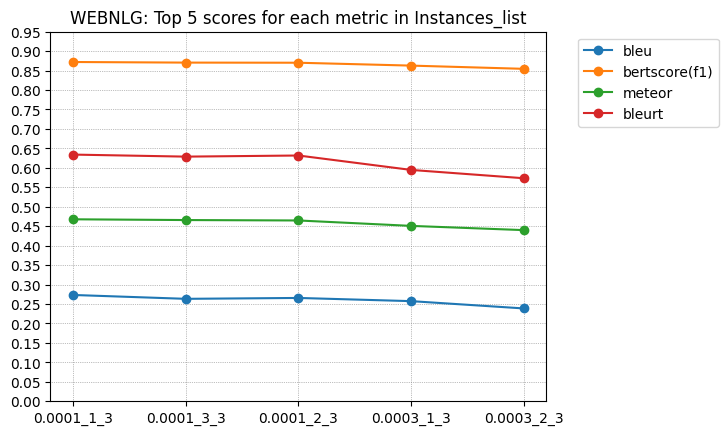

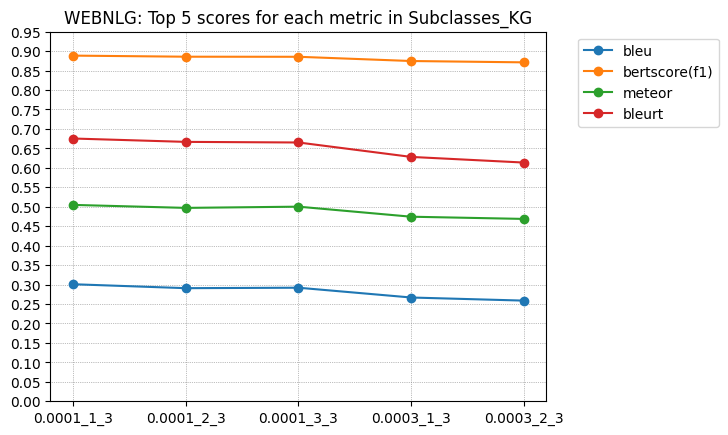

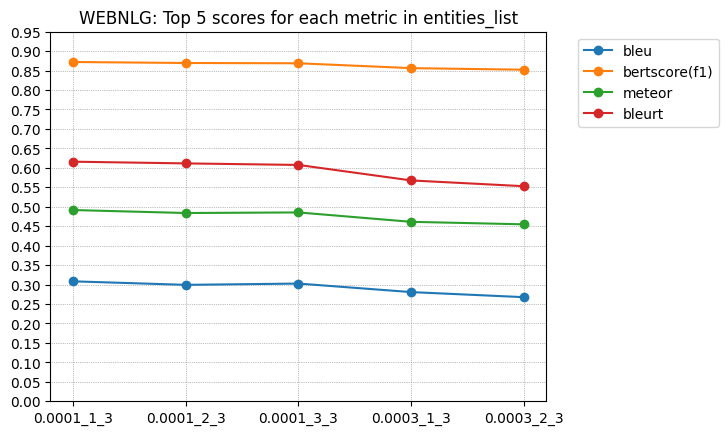

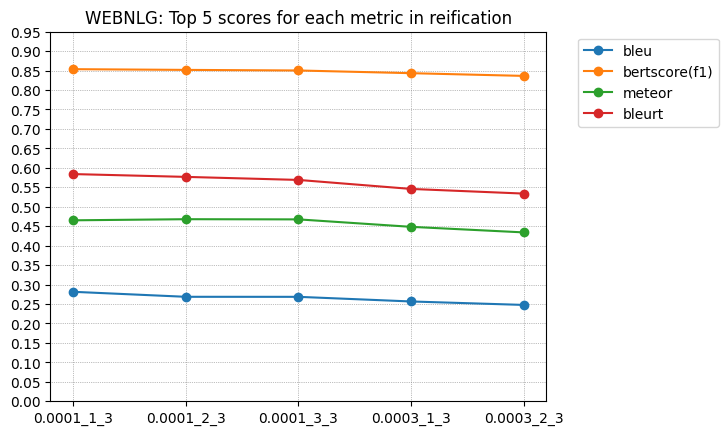

In [67]:
#need preprocessing of files because wrong json formatting LOL 
l = ['Instances_list', 'Subclasses_KG', 'entities_list', 'reification']
import os
for i in l:
    folder_path = f'WEBNLG/webnlg_gridsearch/{i}'

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            # Process the file
            with open(file_path, 'r') as file:
                data = file.read()
            if '][' in data:
                first_section, second_section = data.split("][", 1)

                # Remove the second section's brackets and parse the remaining JSON data
                first_section_data = json.loads(first_section.strip() + "]")

                # Save the first section to a new file
                with open(file_path, "w") as file:
                    json.dump(first_section_data, file, indent=4)
for i in l:
    
    get_df_scores(f'./WEBNLG/webnlg_gridsearch/{i}/')


In [42]:
import os
import json

# Set the directory path containing the JSON files
dir_path = 'WEBNLG/webnlg_gridsearch/Instances_list'

# Get all the JSON file names in the directory
json_files = [f for f in os.listdir(dir_path) if f.endswith('.json')]

# Select the first JSON file in the list
if json_files:
    first_json_file = json_files[1][0]
else:
    print('No JSON files found in directory')
    exit()

# Open the JSON file and load its contents as a dictionary
with open(os.path.join(dir_path, first_json_file)) as f:
    json_contents = json.load(f)

# Print the contents of the JSON file
print(json.dumps(json_contents, indent=4))

FileNotFoundError: [Errno 2] No such file or directory: 'WEBNLG/webnlg_gridsearch/Instances_list/0'

In [45]:
!cd WEBNLG/webnlg_gridsearch/Instances_list && ls


0.0001_1_3_output_metrics.json 0.0005_2_3_output_metrics.json
0.0001_2_3_output_metrics.json 0.0005_3_3_output_metrics.json
0.0001_3_3_output_metrics.json 1e-05_1_3_output_metrics.json
0.0003_1_3_output_metrics.json 1e-05_2_3_output_metrics.json
0.0003_2_3_output_metrics.json 1e-05_3_3_output_metrics.json
0.0003_3_3_output_metrics.json runs
0.0005_1_3_output_metrics.json stories_withInput.json


In [47]:
import os
[]
folder_path = 'WEBNLG/webnlg_gridsearch/Instances_list'

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        # Process the file
        with open(file_path, 'r') as file:
            data = file.read()
        if '][' in data:
            first_section, second_section = data.split("][", 1)

            # Remove the second section's brackets and parse the remaining JSON data
            first_section_data = json.loads(first_section.strip() + "]")

            # Save the first section to a new file
            with open(file_path, "w") as file:
                json.dump(first_section_data, file, indent=4)


In [46]:
import json
dir_path = 'WEBNLG/webnlg_gridsearch/Instances_list'

# Get all the JSON file names in the directory
# data = [f for f in os.listdir(dir_path) if f.endswith('.json')]
# if '][\' in data:

# Open the input file
with open("/Users/macoftraopia/Documents/GitHub/KGNarrative/results/WEBNLG/webnlg_gridsearch/Instances_list/0.0001_2_3_output_metrics.json", "r") as file:
    data = file.read()

# Split the data into two sections based on the second set of brackets
first_section, second_section = data.split("][", 1)

# Remove the second section's brackets and parse the remaining JSON data
first_section_data = json.loads(first_section.strip() + "]")

# Save the first section to a new file
with open("/Users/macoftraopia/Documents/GitHub/KGNarrative/results/WEBNLG/webnlg_gridsearch/Instances_list/0.0001_2_3_output_metrics.json", "w") as file:
    json.dump(first_section_data, file, indent=4)



ValueError: not enough values to unpack (expected 2, got 1)

## PER SCORE


{'5e-05_5_3': 0.2302745658869256, '5e-05_1_3': 0.23187352258167382, '3e-06_1_3': 0.23322341532462634, '3e-06_3_3': 0.23339237370082347, '3e-06_5_3': 0.2352139892074324, '0.0005_1_3': 0.24458208260152203, '0.0003_1_3': 0.2555157068585605, '0.0003_3_3': 0.26717179883222614, '0.0003_5_3': 0.27012543307894293, '0.0001_5_3': 0.2950636686680576, '0.0001_3_3': 0.2968857598474111, '0.0001_1_3': 0.297811417454515}


<BarContainer object of 12 artists>

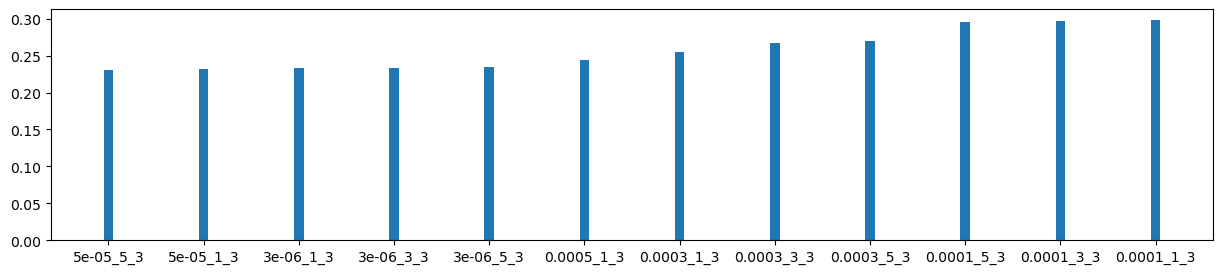

In [25]:

blues={k: v for k, v in sorted(blues.items(), key=lambda item: item[1]) if v>0.23}
print(blues)

# Data for plotting
plt.figure(figsize=(15, 3))  # width:20, height:3
plt.bar((blues.keys()),blues.values(),width=0.1)
#plt.bar(range(len(my_dict)), my_dict.values(), align='edge', width=0.3)


(0.7, 1.0)

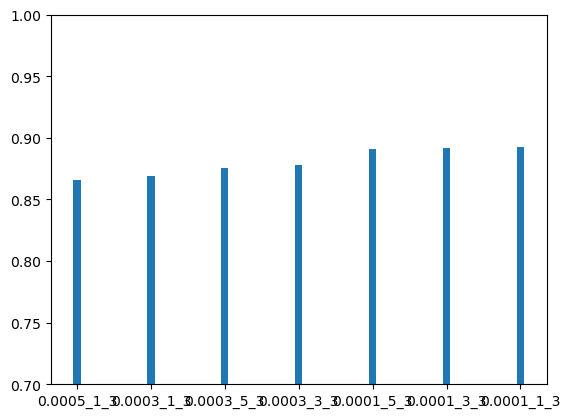

In [26]:
bertscores={k: v for k, v in sorted(bertscores.items(), key=lambda item: item[1]) if v>0.86 }
fig, ax = plt.subplots()

ax.bar((bertscores.keys()),bertscores.values(),width=0.1)

ax.set_ylim(0.7, 1)  # outliers only

<BarContainer object of 6 artists>

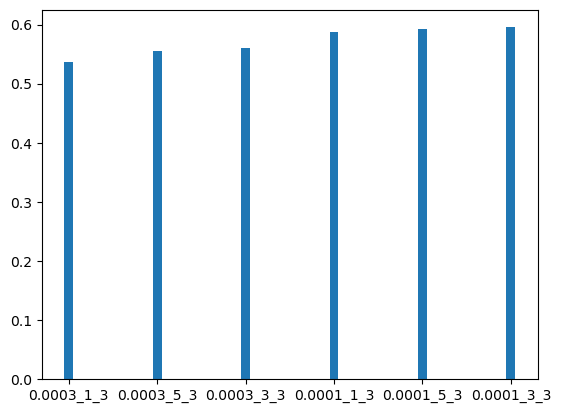

In [27]:
meteors={k: v for k, v in sorted(meteors.items(), key=lambda item: item[1]) if v>0.53 }
fig, ax = plt.subplots()
ax.bar((meteors.keys()),meteors.values(),width=0.1)

<BarContainer object of 6 artists>

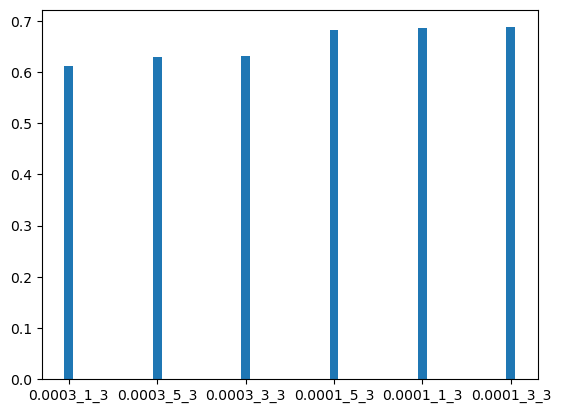

In [28]:
bleurts={k: v for k, v in sorted(bleurts.items(), key=lambda item: item[1]) if v>0.6 }
fig, ax = plt.subplots()
ax.bar((bleurts.keys()),bleurts.values(),width=0.1)

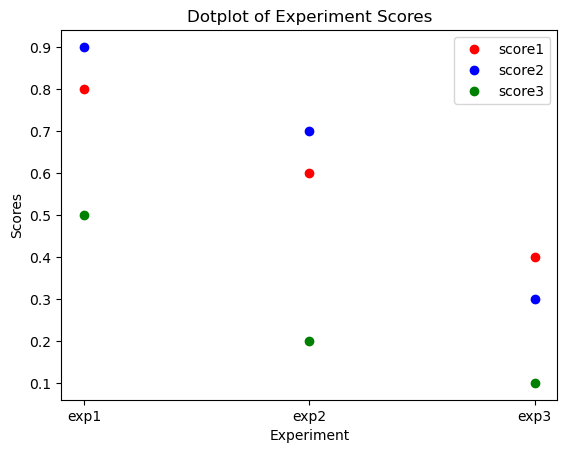

In [29]:
import matplotlib.pyplot as plt

# define the scores for each experiment
exp1_scores = [0.8, 0.6, 0.4]
exp2_scores = [0.9, 0.7, 0.3]
exp3_scores = [0.5, 0.2, 0.1]

# define the x-axis labels
x_labels = ['exp1', 'exp2', 'exp3']

# plot the scores using different colors
plt.plot(x_labels, exp1_scores, 'ro', label='score1')
plt.plot(x_labels, exp2_scores, 'bo', label='score2')
plt.plot(x_labels, exp3_scores, 'go', label='score3')

# set the axis labels and title
plt.xlabel('Experiment')
plt.ylabel('Scores')
plt.title('Dotplot of Experiment Scores')

# add a legend to the plot
plt.legend()

# display the plot
plt.show()

